In [ ]:
"""
Comparative Study of Integration Methods
===========================================================

In this section, we compare four numerical integration methods to estimate the integral of
    f(x) = exp(-sum(x))
over the 5-dimensional hypercube [0,1]^5. The true value of the integral is
    I = (1 - e^{-1})^5.

The methods we compare are:
    1. Standard Monte Carlo Integration
    2. Quasi-Monte Carlo Integration (using Sobol sequences)
    3. Stratified Sampling Integration
    4. Importance Sampling Integration
"""


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc, beta
import time

In [2]:
np.random.seed(42)

d = 5
true_val = (1 - np.exp(-1))**d
print("True value of the integral:", true_val)

True value of the integral: 0.10092519027486131


In [3]:
def mc_integration(N, d):
    """
    Standard Monte Carlo Integration:
    Generate N uniformly distributed samples in [0,1]^d and compute the mean value
    of f(x) = exp(-sum(x)).
    """
    x = np.random.uniform(0, 1, size=(N, d))
    fx = np.exp(-np.sum(x, axis=1))
    return np.mean(fx)

est_mc = mc_integration(100000, d)
print("Monte Carlo estimate:", est_mc)

Monte Carlo estimate: 0.10074271281798693


In [4]:
def qmc_integration(N, d):
    """
    Quasi-Monte Carlo Integration:
    """
    sampler = qmc.Sobol(d, scramble=True)
    m = int(np.ceil(np.log2(N)))
    N_power2 = 2**m
    x = sampler.random_base2(m=m)[:N, :]
    fx = np.exp(-np.sum(x, axis=1))
    return np.mean(fx)

est_qmc = qmc_integration(100000, d)
print("Quasi-Monte Carlo estimate:", est_qmc)


Quasi-Monte Carlo estimate: 0.10092443497792525


In [5]:
def stratified_integration(m, d):
    """
    Stratified Sampling Integration:
    Total samples = m^d.
    """
    grids = [np.linspace(0, 1, m+1) for _ in range(d)]
    mesh = np.meshgrid(*[grid[:-1] for grid in grids], indexing='ij')
    lower_bounds = np.stack([m.flatten() for m in mesh], axis=-1)
    cell_width = 1.0 / m
    N = m**d
    x = lower_bounds + np.random.uniform(0, cell_width, size=(N, d))
    fx = np.exp(-np.sum(x, axis=1))
    return np.mean(fx)

est_strat = stratified_integration(4, d)
print("Stratified Sampling estimate:", est_strat)

Stratified Sampling estimate: 0.10093547965633823


In [6]:
def importance_integration(N, d):
    """
    Importance Sampling Integration:
    """
    x = beta.rvs(1, 2, size=(N, d))
    qx = np.prod(2 * (1 - x), axis=1)
    fx = np.exp(-np.sum(x, axis=1))
    return np.mean(fx / qx)

est_imp = importance_integration(100000, d)
print("Importance Sampling estimate:", est_imp)

Importance Sampling estimate: 0.10120416808831738


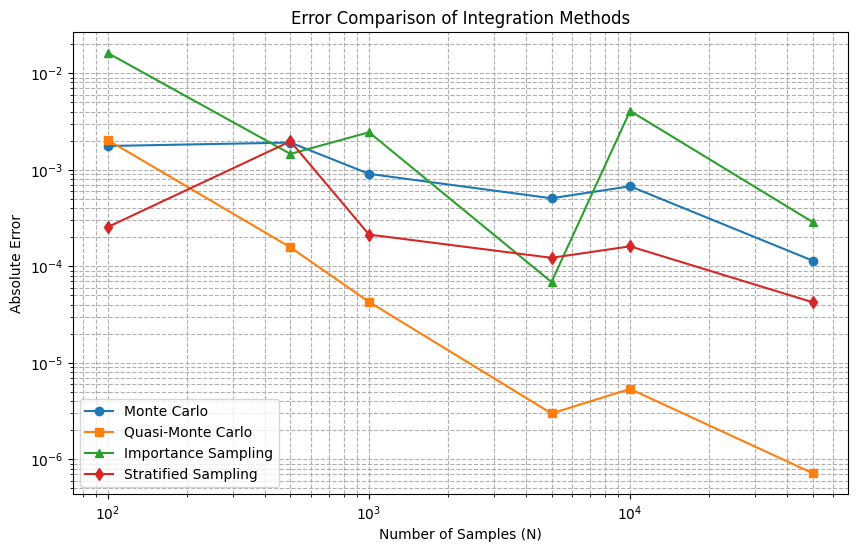

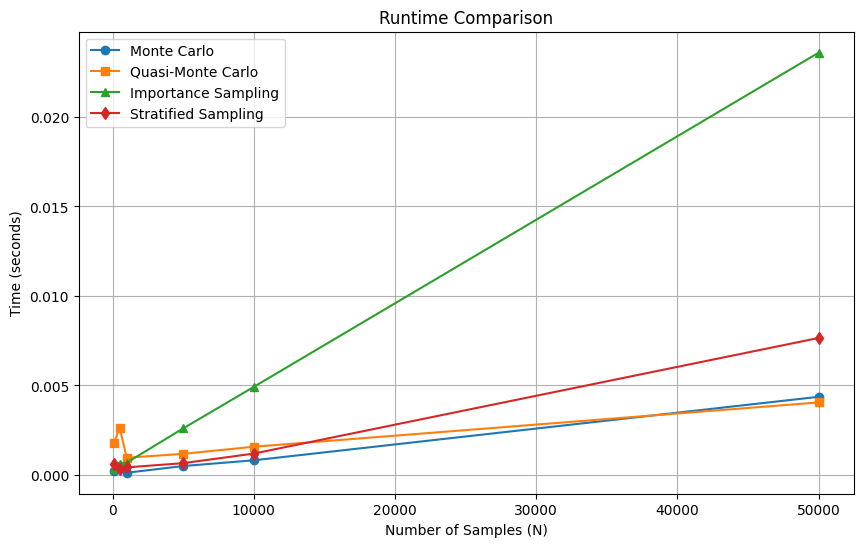

In [7]:
sample_sizes_mc = [100, 500, 1000, 5000, 10000, 50000]
errors_mc = []
errors_qmc = []
errors_imp = []
errors_strat = []

times_mc = []
times_qmc = []
times_imp = []
times_strat = []

for N in sample_sizes_mc:
    # Standard Monte Carlo
    start = time.time()
    est = mc_integration(N, d)
    times_mc.append(time.time() - start)
    errors_mc.append(abs(est - true_val))

    # Quasi-Monte Carlo
    start = time.time()
    est = qmc_integration(N, d)
    times_qmc.append(time.time() - start)
    errors_qmc.append(abs(est - true_val))

    # Importance Sampling
    start = time.time()
    est = importance_integration(N, d)
    times_imp.append(time.time() - start)
    errors_imp.append(abs(est - true_val))

    # Stratified Sampling: choose m such that m^d is approximately N
    m = int(round(N ** (1/d)))
    start = time.time()
    est = stratified_integration(m, d)
    times_strat.append(time.time() - start)
    errors_strat.append(abs(est - true_val))

# Plot: Absolute error vs. Number of samples
plt.figure(figsize=(10, 6))
plt.loglog(sample_sizes_mc, errors_mc, 'o-', label='Monte Carlo')
plt.loglog(sample_sizes_mc, errors_qmc, 's-', label='Quasi-Monte Carlo')
plt.loglog(sample_sizes_mc, errors_imp, '^-', label='Importance Sampling')
plt.loglog(sample_sizes_mc, errors_strat, 'd-', label='Stratified Sampling')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Absolute Error')
plt.title('Error Comparison of Integration Methods')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()

# Plot: Runtime vs. Number of samples
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes_mc, times_mc, 'o-', label='Monte Carlo')
plt.plot(sample_sizes_mc, times_qmc, 's-', label='Quasi-Monte Carlo')
plt.plot(sample_sizes_mc, times_imp, '^-', label='Importance Sampling')
plt.plot(sample_sizes_mc, times_strat, 'd-', label='Stratified Sampling')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Time (seconds)')
plt.title('Runtime Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
"""
Conclusions:
From the plots generated, we can observe how the absolute error generally decreases as the number of samples increases.
A few observations:
    - Standard Monte Carlo is straightforward but may require many samples for high accuracy, but its runtime is reletively low.
    - Quasi-Monte Carlo, the most accurate with increasing number of samples. Also with the lowest runtime with large sample sizes.
    - Stratified Sampling improves variance reduction by uniformly covering the domain.
    - Importance Sampling, with a suitable choice of distribution (here Beta(1,2)), can significantly reduce variance. Runtime is the largest out of all methods.

This comparative analysis demonstrates the trade-offs between different integration methods for high-dimensional problems.
"""

'\nConclusions:\n-------------\nFrom the plots generated, you can observe how the absolute error decreases as the number of samples increases.\nA few observations:\n    - Standard Monte Carlo is straightforward but may require many samples for high accuracy.\n    - Quasi-Monte Carlo, using Sobol sequences, often shows faster convergence.\n    - Stratified Sampling improves variance reduction by uniformly covering the domain.\n    - Importance Sampling, with a suitable choice of distribution (here Beta(1,2)), can significantly reduce variance.\n    \nThis comparative analysis demonstrates the trade-offs between different integration methods for high-dimensional problems.\nFeel free to experiment further with different integrands, dimensions, or sample sizes.\n'